# Analise dataset: Sample Sales Data
Por: Natan Carvalho\
Analise para fins de prática de estudo de Pandas, numpy e matplotlib.\
Dataset disponível no Kaggle: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

## Importando bibliotecas que serão utilizadas e fazendo configurações iniciais.

In [87]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [88]:
# Configurando casas decimais do pandas para 3
pd.set_option('display.precision', 3)
# Configurando exibição máxima de colunas para 30
pd.set_option('display.max_columns', 30)
# Configurando para ignorar avisos
warnings.filterwarnings("ignore")

## Trazendo dataset e fazendo verificações iniciais.
Nota-se que o dataset está em formato .csv com os separadores padrão, portanto não será necessário indicar outro separador no momento da importação do mesmo.

In [90]:
# Armazenando dataset em variável
df = pd.read_csv('./Dataset/sales_data_sample.csv')

In [91]:
# Exibindo cabeçalho
df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


In [92]:
# Exibindo final do dataset
df.tail(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [93]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


***
Inicialmente é possível verificar que o atributo **ORDERDATE** está em formato incorreto. Aparentemente vamos conseguir descartar algumas colunas que não serão utilizadas. Faremos mais algumas verificações antes de começar o tratamento dos dados.

In [95]:
# Verificando valores nulos
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

***
Os atributos que contém valores nulos terão suas colunas excluídas. Portanto não será feito nenhum tipo de tratamento nos mesmos

## Tratando dataset.

In [98]:
# Colocando coluna ORDERDATE em formato de data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format = '%m/%d/%Y %H:%M', errors = 'ignore')

In [99]:
# Verificando se ficaram valores nulos no campo
df['ORDERDATE'].isna().sum()

0

In [100]:
# Exluido colunas que não serão usadas
df.drop(columns = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'QTR_ID'], inplace = True)

In [101]:
# Criando coluna que demonstra a diferença de valores entre o valor de venda (PRICEEACH) e o sugerido pelo fabricante (MSRP).
df['PRICEDIFFERENCE'] = df['PRICEEACH'] - df['MSRP']

In [102]:
# Criando coluna  categórica sobre a diferenca de preço
df['CATPRICEDIFF'] = df['PRICEDIFFERENCE'].apply(lambda x : 'Positive' if x > 0 else ('Equal' if x == 0 else 'Negative'))

In [103]:
# Verificando se as colunas foram adicionadas
df.shape

(2823, 20)

In [104]:
# Reordenando colunas
df = df[['ORDERNUMBER', 'STATUS', 'ORDERLINENUMBER', 'ORDERDATE', 
    'YEAR_ID', 'MONTH_ID', 'CUSTOMERNAME', 'CONTACTFIRSTNAME', 
    'CONTACTLASTNAME', 'DEALSIZE', 'COUNTRY', 'CITY', 
    'PRODUCTCODE', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 
    'MSRP', 'PRICEDIFFERENCE', 'CATPRICEDIFF', 'PRODUCTLINE']]

In [105]:
# Exibindo amostra do dataset tratado
df.sample(6)

,ORDERNUMBER,STATUS,ORDERLINENUMBER,ORDERDATE,YEAR_ID,MONTH_ID,CUSTOMERNAME,CONTACTFIRSTNAME,CONTACTLASTNAME,DEALSIZE,COUNTRY,CITY,PRODUCTCODE,QUANTITYORDERED,PRICEEACH,SALES,MSRP,PRICEDIFFERENCE,CATPRICEDIFF,PRODUCTLINE
627,10122,Shipped,1,2003-05-08,2003,5,Marseille Mini Autos,Laurence,Lebihan,Medium,France,Marseille,S18_1984,31,100.00,4100.99,142,-42.00,Negative,Classic Cars
1717,10114,Shipped,1,2003-04-01,2003,4,"La Corne D'abondance, Co.",Marie,Bertrand,Small,France,Paris,S24_2840,24,30.06,721.44,35,-4.94,Negative,Classic Cars
1242,10117,Shipped,12,2003-04-16,2003,4,"Dragon Souveniers, Ltd.",Eric,Natividad,Small,Singapore,Singapore,S18_4027,22,100.00,2780.58,143,-43.00,Negative,Classic Cars
1684,10309,Shipped,2,2004-10-15,2004,10,Baane Mini Imports,Jonas,Bergulfsen,Small,Norway,Stavern,S24_2360,24,56.10,1346.40,69,-12.90,Negative,Motorcycles
1679,10252,Shipped,8,2004-05-26,2004,5,Auto Canal Petit,Dominique,Perrier,Medium,France,Paris,S24_2360,47,65.80,3092.60,69,-3.20,Negative,Motorcycles
2670,10168,Shipped,15,2003-10-28,2003,10,Technics Stores Inc.,Juri,Hirano,Medium,USA,Burlingame,S700_3167,48,96.00,4608.00,80,16.00,Positive,Planes


## Análise exploratória

### 1 - Faturamento por ano

In [108]:
# Verificando qual valor de vendas por ano ao longo dos meses
vendaAnoMes = df.pivot_table(
    index = 'YEAR_ID',
    columns = 'MONTH_ID',
    values = 'SALES',
    aggfunc = 'sum',
)

In [109]:
# Exibindo dataset
vendaAnoMes

MONTH_ID,1,2,3,4,5,6,7,8,9,10,11,12
YEAR_ID,,,,,,,,,,,,
2003,129753.60,140836.19,174504.90,201609.55,192673.11,168082.56,187731.88,197809.30,263973.36,568290.97,1.030e+06,261876.46
2004,316577.42,311419.53,205733.73,206148.12,273438.39,286674.22,327144.09,461501.27,320750.91,552924.25,1.089e+06,372802.66
2005,339543.42,358186.18,374262.76,261633.29,457861.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nota-se que **não há** registros de vendas a partir do mês 6 de 2005.

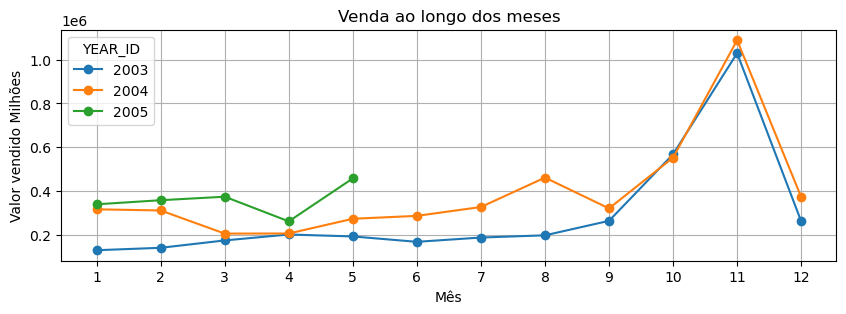

In [111]:
# Plotando gráfico mostrando vendas durante os meses
vendaAnoMes.T.plot(
    figsize = (10, 3),
    title = 'Venda ao longo dos meses',
    marker = 'o',
    xticks = np.arange(1, 13),
    xlabel = 'Mês',
    ylabel = 'Valor vendido (Milhões)',
    grid = True,

);

Praticamente em todos os meses o valor de venda foi superior quando relacionado com o do ano anterior, exeto no mês dez, onde o ano de 2003 vendeu mais que o de 2004. Mesmo com registros somente até o mês cinco o ano de 2005 se mostra superando os valores para o mesmo período dos anos anteriores.

### 2 - Status do pedido por ano 

In [114]:
# Status dos pedidos por ano
statusAno = df.pivot_table(
    index = 'STATUS',
    columns = 'YEAR_ID',
    values = 'ORDERNUMBER',
    aggfunc = 'count'
)
# Exibnindo dataframe
statusAno.style.background_gradient(cmap = 'cubehelix_r')

YEAR_ID,2003,2004,2005
STATUS,,,
Cancelled,16.000000,44.000000,nan
Disputed,nan,nan,14.000000
In Process,nan,nan,41.000000
On Hold,nan,6.000000,38.000000
Resolved,8.000000,8.000000,31.000000
Shipped,976.000000,1287.000000,354.000000


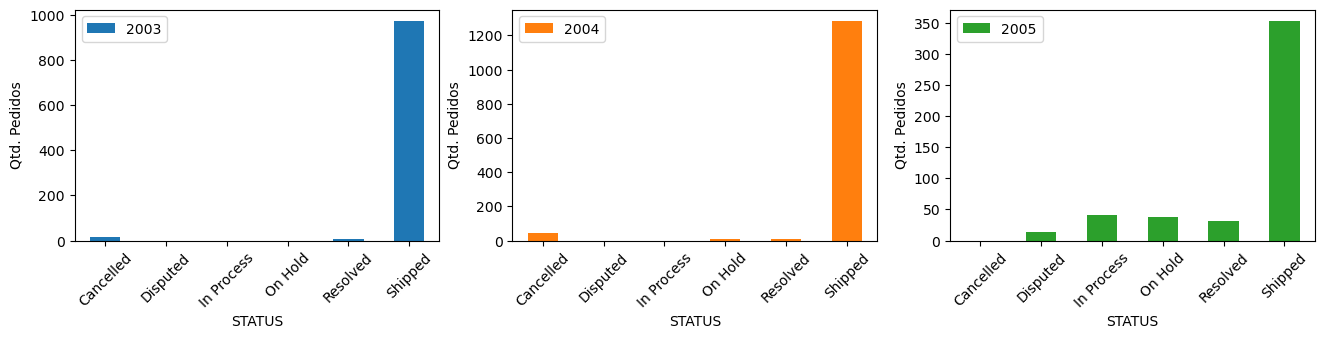

In [175]:
# Plotando gráfico de status para cada ano
statusAno.plot(kind = 'bar',
              figsize = (16, 3),
              layout = (1, 3),
              title = ['', '', ''], 
              subplots = True,
              sharey = False, 
              fontsize = 10, 
              ylabel = 'Qtd. Pedidos',
              rot = 45
              );

De modo geral a maior parte dos pedidos está com o status "Shipped" e o ano de 2005 não registra nenhum pedido cancelado. \
(Lembrando que para o ano de 2005 só há registros dos cinco primeiros meses)

### 3 - Quais categorias com mais pedidos cancelados?

In [118]:
# Verificando categorias que mais tiveram pedido cancelado
cancelados = df.query('`STATUS` == "Cancelled"').groupby('PRODUCTLINE')['PRODUCTLINE'].count().sort_values(ascending = False)
# Exibindo Series
cancelados

PRODUCTLINE
Ships           18
Classic Cars    16
Vintage Cars    13
Planes          12
Trains           1
Name: PRODUCTLINE, dtype: int64

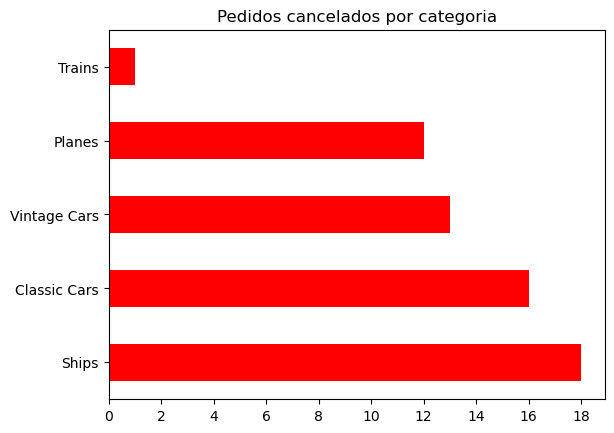

In [119]:
# Plotando gráfico
cancelados.plot(kind = 'barh',
                title = 'Pedidos cancelados por categoria',
                ylabel = '',
               xticks = (np.arange(0, cancelados.max()+1, 2)),
               color = 'red');

### 4 - Qual o porte empresarial dos clientes?

In [121]:
# Verificando porte da empresa dos clientes
porteClientes = df.groupby('DEALSIZE')['ORDERNUMBER'].count()
# Exibindo dataframe
porteClientes

DEALSIZE
Large      157
Medium    1384
Small     1282
Name: ORDERNUMBER, dtype: int64

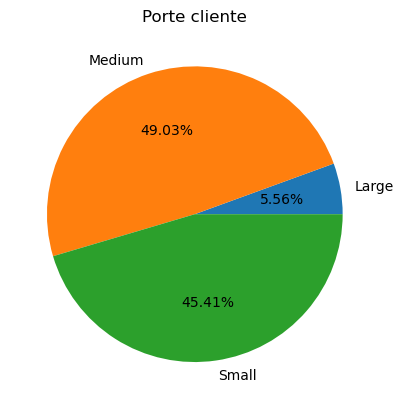

In [122]:
# Plotando gráfico de pizza
porteClientes.plot(kind = 'pie',
                  x = 'DEALSIZE',
                  y = 'CUSTOMERS',
                  title = 'Porte cliente', 
                  autopct = '%1.2f%%',
                  ylabel = ''
                  );

O porte dos clientes são quase igualitariamente de portes Medium e Small sendo o porte predominante **Medium**, ficando apenas uma fração de porte large.

### 5 - Quais as categorias com mais vendas em ordem de quantidade?

In [125]:
# Categoria que mais vende em ordem de quantidade
catQuantidade = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending = False)
# Exibindo Series
catQuantidade

PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Ships                8127
Trains               2712
Name: QUANTITYORDERED, dtype: int64

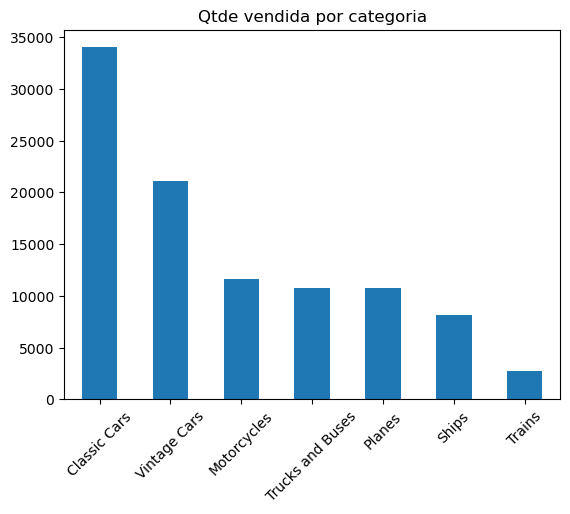

In [126]:
# Plotando gráfico
catQuantidade.plot(
    kind = 'bar',
    title = 'Qtde vendida por categoria',
    rot = 45,
    ylabel = '',
    xlabel = ''
);

### 6 - Qual a distribuição da categoria de valor praticado em relação ao sugerido?

In [128]:
# Contando pedidos de acordo com a categoria
catPreco = df.groupby('CATPRICEDIFF')['ORDERNUMBER'].count()
# Exibindo Series
catPreco

CATPRICEDIFF
Equal         27
Negative    1953
Positive     843
Name: ORDERNUMBER, dtype: int64

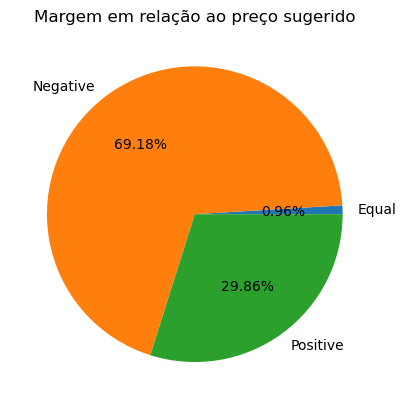

In [129]:
# Plotando gráfico
catPreco.plot(
    kind = 'pie',
    title = 'Margem em relação ao preço sugerido',
    autopct = '%1.2f%%',
    ylabel = ''
);

### 7 - Qual a diferença média positiva entre o valor sugerido e praticado por cada país?

In [131]:
# Diferença média de preço praticado por pais
medPositiva = df.query("`PRICEDIFFERENCE` > 0").groupby('COUNTRY')['PRICEDIFFERENCE'].mean().sort_values()
# Exibindo Series
medPositiva

COUNTRY
Philippines     5.638
Ireland         5.948
Singapore       5.969
Italy           6.031
Canada          6.853
Sweden          7.010
Belgium         7.539
Germany         7.722
Switzerland     7.764
Austria         8.407
Denmark         9.581
Norway          9.944
USA            10.378
UK             10.505
Finland        10.662
France         11.036
Spain          13.031
Australia      13.190
Japan          14.840
Name: PRICEDIFFERENCE, dtype: float64

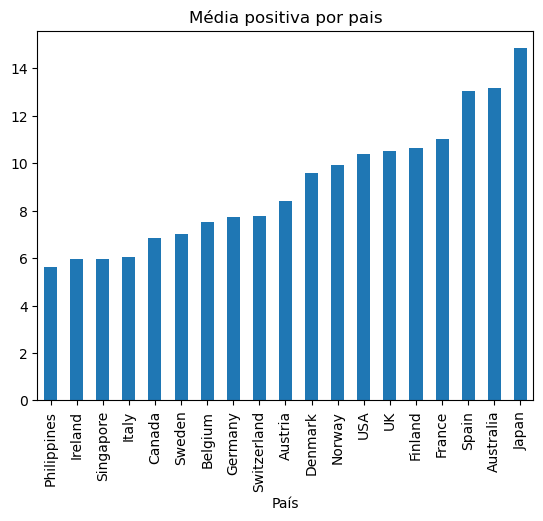

In [132]:
# Plotando gráfico
medPositiva.plot(
    kind = 'bar',
    title = 'Média positiva por pais',
    xlabel = 'País'
);

### 8 - Quais os 5 Produtos com maior diferença negativa entre o preço sugerido?

In [134]:
# Trazendo produtos
prodNegativos = df.groupby('PRODUCTCODE')['PRICEDIFFERENCE'].sum().nsmallest(5)
# Exibindo Series
prodNegativos

PRODUCTCODE
S18_3232   -3637.66
S10_1949   -3192.00
S12_1108   -2939.30
S10_4698   -2454.56
S12_1099   -2438.45
Name: PRICEDIFFERENCE, dtype: float64

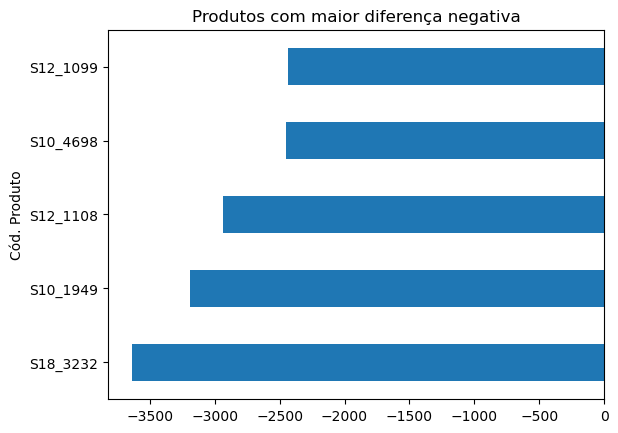

In [135]:
# Plotando gráfico
prodNegativos.plot(
    kind = 'barh',
    title = 'Produtos com maior diferença negativa',
    ylabel = 'Cód. Produto'
);

### 9 - Quais os 3 Países com mais pedidos?

In [259]:
# Filtrando paises
top3PaisesPedidos = df.groupby('COUNTRY')['ORDERNUMBER'].count().sort_values(ascending = False).to_frame()[0:3]
# Exibindo resultado
top3PaisesPedidos

,ORDERNUMBER
COUNTRY,
USA,1004
Spain,342
France,314


### 10 - Qual o ticket médio por ano

In [267]:
df.groupby('YEAR_ID')['SALES'].mean()

YEAR_ID
2003    3516.980
2004    3512.389
2005    3747.880
Name: SALES, dtype: float64

## Conclusões
<ol>
    <li>O valor vendido se supera a cada ano exceto no mês 10 de 2003 que superou as vendas do ano seguinte. O ano de 2005 que só contém registros até o quinto mês se mostrou com a mesma tendência de superar os anos anteriores em todos os meses registrados. </li>
    <li>A maior parte dos pedidos tem o STATUS como shipped. Os pedidos com status cancelado são ínfimos, por isso seus registros foram considerados. O ano de 2005 não registrou nenhum pedido cancelado no período em que tem registro.</li>
    <li>Dos pedidos cancelados as três categorias mais canceladas são: Ships (18 pedidos), Classic Cars (16 pedidos) e Vintage Cars (13 pedidos).</li>
    <li>O porte dos clientes é predominantemente medium e small, ficando apenas uma pequena fração para o porte large.</li>
    <li>As 3 categorias mais vendidas em ordem de quantidade são: Classic Cars, Vintage Cars e Motorcycles.</li>
    <li>69,18% dos valores praticados em relação ao preço sugerido são negativos.</li>
    <li>Spain, Australia e Japan são os países com maior média positiva de preço praticado em comparação com o sugerido sendo superiores à \$12.</li>
    <li>A  diferença individual dos 5 produtos com maior diferença negativa é de pelo menos $-2000.</li>
    <li>Os países com maior quantidade de pedidso são; USA, Spain e France.</li>
    <li>O ticket médio de 2003 e 2004 não variou muito, e o ano com o maior ticket médio é 2005.</li>
</ol>